In [11]:
rm(list = ls())

In [12]:
library(ggplot2)
library(dplyr)


all_data<- read.csv("../result/C_index_result.csv")

color_palette <- c(
  "snp" = "#9EBCDA",
  "drug" = "#EBC595",
  "cnv" = "#FF6F61",
  "baseline" = "#D0896E",
  "drug_snp" = "#FF5733",  
  "drug_cnv" = "#FFBF00",
  "drug_cnv_snp" = "#DAF7A6"  
)


legend_labels <- c(
  "snp" = "SNP",
  "drug" = "Drug",
  "cnv" = "CNV",
  "baseline" = "Baseline",
  "drug_snp" = "Drug_SNP",
  "drug_cnv" = "Drug_CNV",
  "drug_cnv_snp" = "Drug_CNV_SNP"
)

group_order <- c("baseline", "drug","snp", "cnv", "drug_snp", "drug_cnv", "drug_cnv_snp")

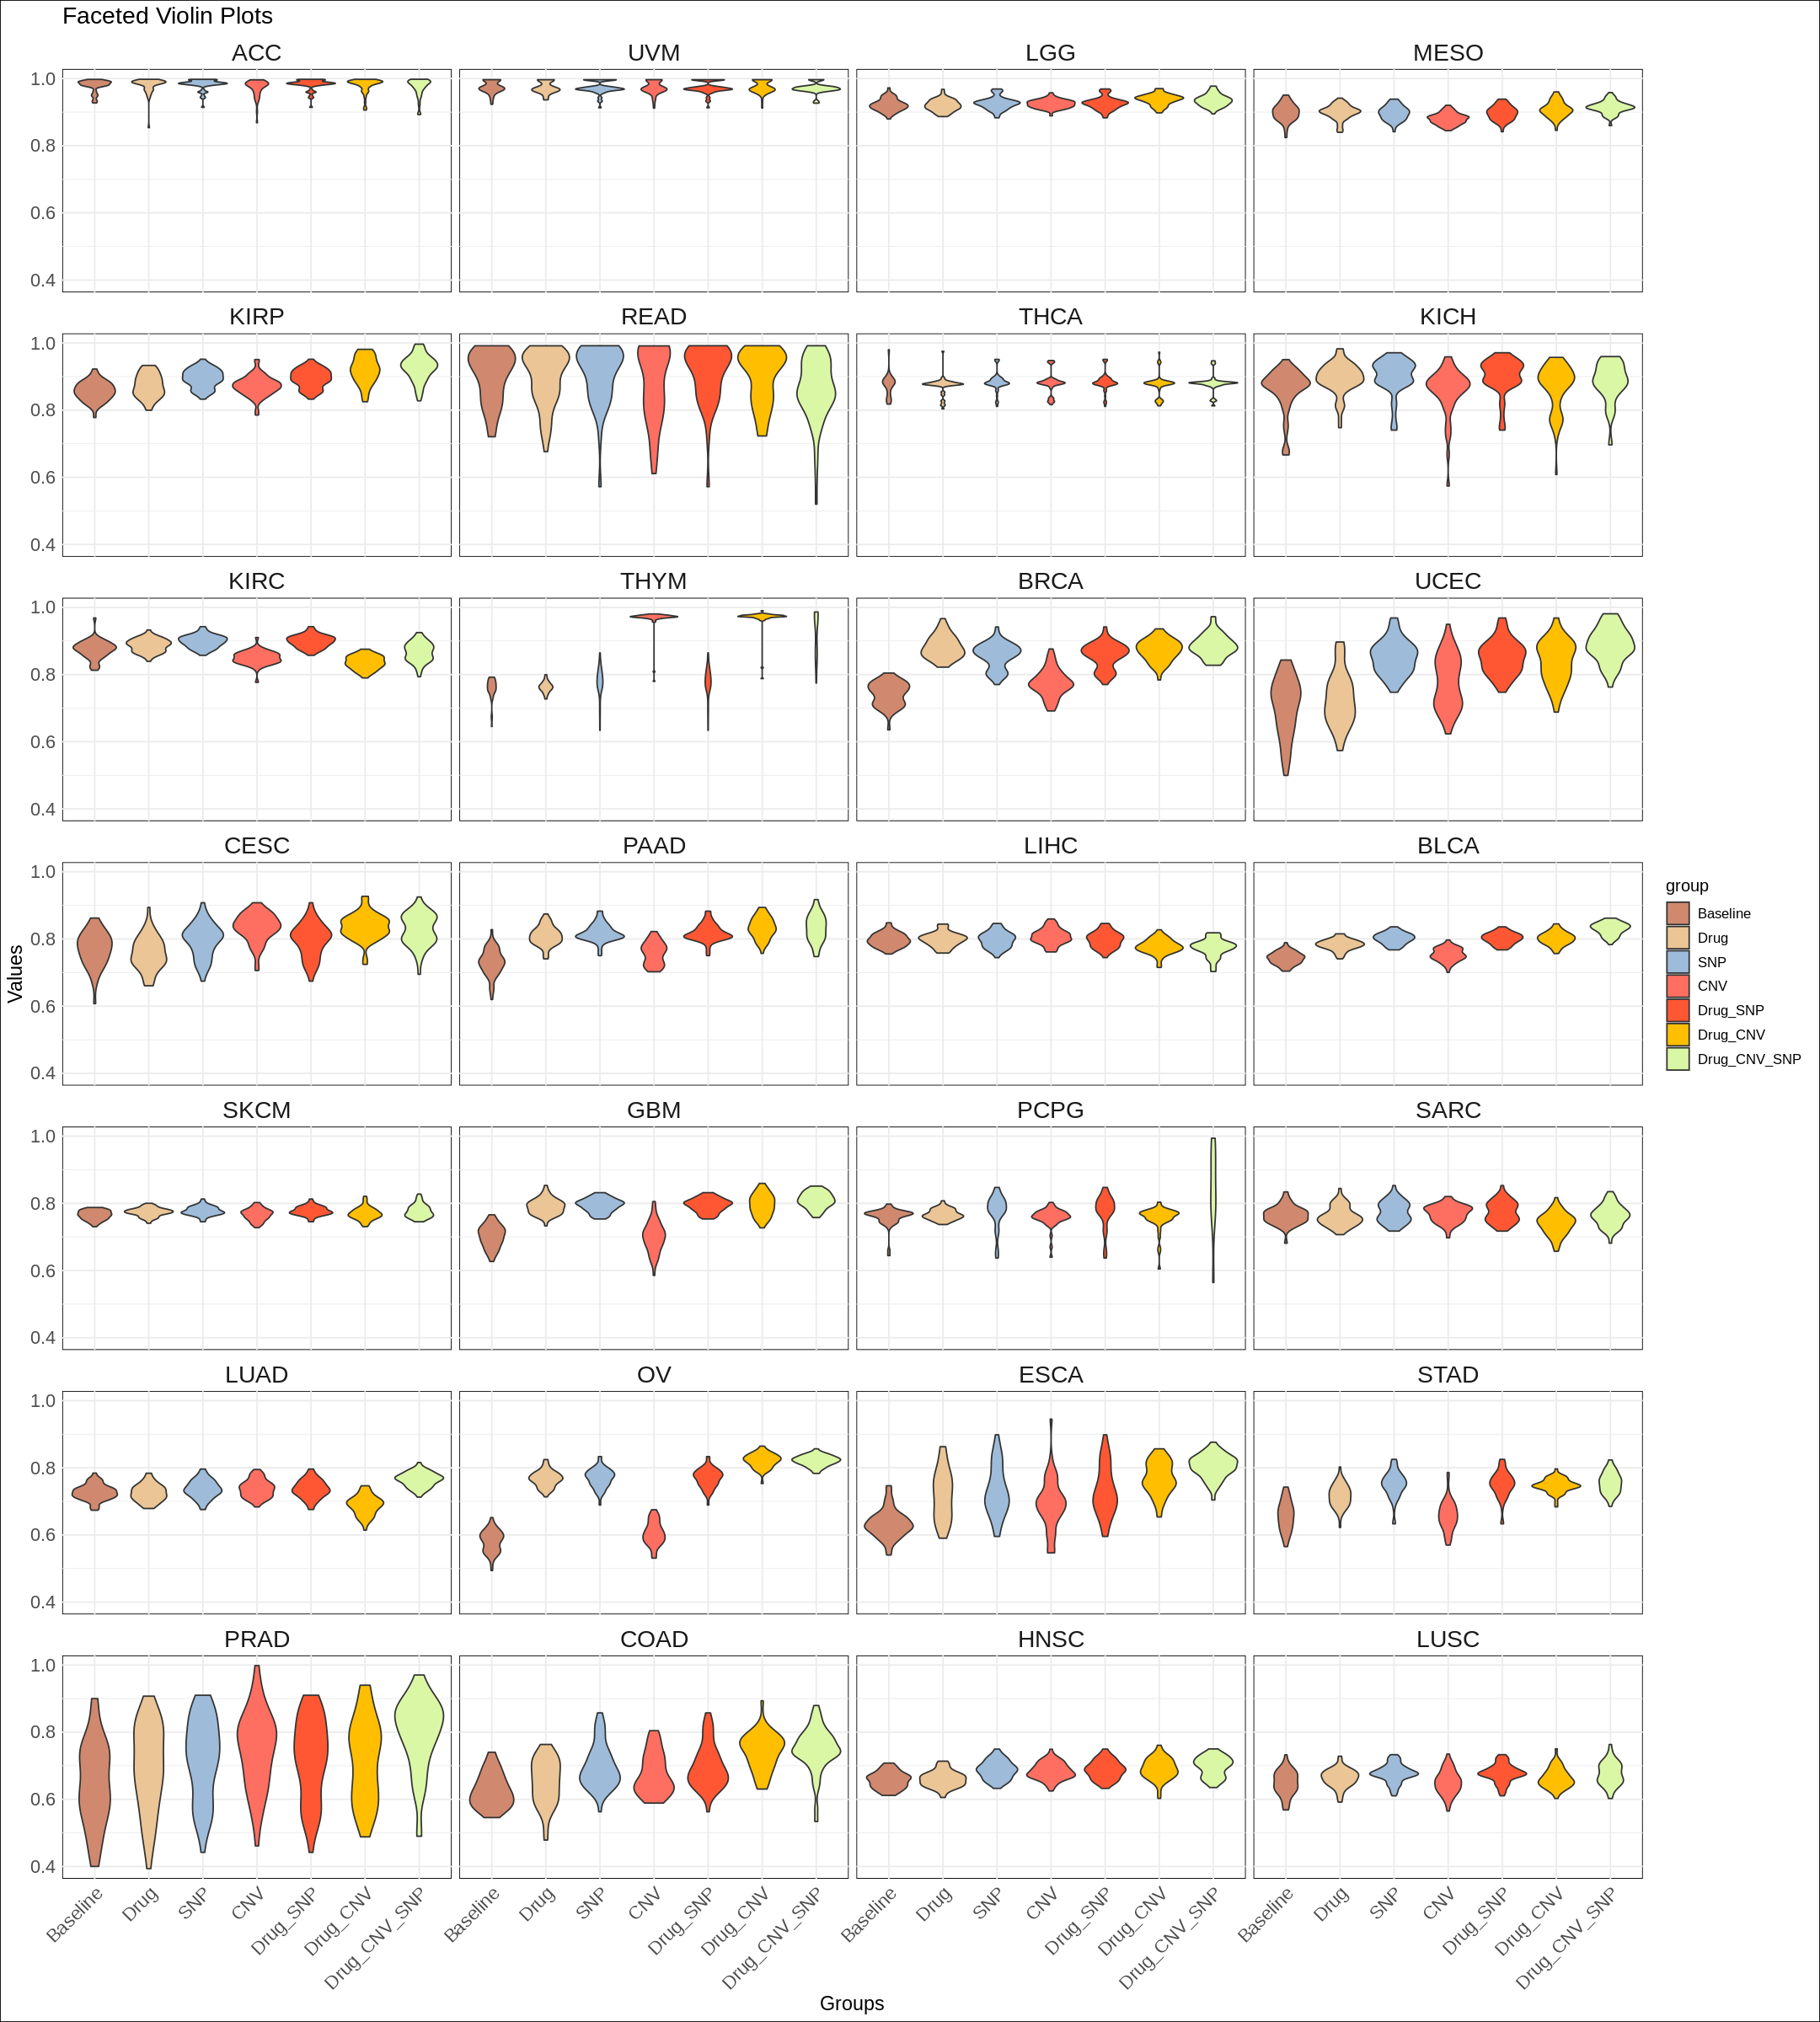

In [13]:
#normal
data_plot <- all_data

summary_data <- data_plot %>%
  group_by(Cancer_type) %>%
  summarise(
    mean_value = mean(c_index, na.rm = TRUE),
    variance = var(c_index, na.rm = TRUE)
  ) %>%
  mutate(
    # Create a combined score where higher mean and lower variance rank higher
    score = mean_value / (1 + variance)  
  ) %>%
  arrange(desc(score))

data_plot$Cancer_type <- factor(data_plot$Cancer_type, levels = summary_data$Cancer_type)

data_plot$group <- factor(data_plot$group, levels = group_order)

# Create the faceted plot for overall group
facet_plot <- ggplot(data_plot, aes(x = group, y = as.numeric(c_index), fill = group)) +
  geom_violin() +
  scale_fill_manual(values = color_palette, labels = legend_labels) +
  labs(x = "Groups", y = "Values", title = "Faceted Violin Plots") +
  scale_x_discrete(labels = c(
    "baseline" = "Baseline",
    "drug" = "Drug",
    "snp" = "SNP",
    "cnv" = "CNV",
    "drug_cnv" = "Drug_CNV",
    "drug_snp" = "Drug_SNP",
    "drug_cnv_snp" = "Drug_CNV_SNP"
  )) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 17),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.text = element_text(size = 13),
    legend.title = element_text(size = 12),
    panel.background = element_rect(fill = "white"),
    plot.background = element_rect(fill = "white"),
    legend.text = element_text(size = 10),
    strip.text = element_text(size = 17)
  ) +
  facet_wrap(~ Cancer_type, ncol = 4)

options(
  repr.plot.width = 18,
  repr.plot.height = 20
)


print(facet_plot)
ggsave("Fig_3A.png", facet_plot, width = 30, height = 20, dpi = 300)

